In [1]:
import json
import numpy as np
import pandas as pd
import time

In [2]:
import matplotlib.pyplot as plt

## global variables

In [3]:
gamma = 0.2
landa = 0.2
error_weight = 1

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import pulp

In [19]:
def LpMinimizeRegression(x_train,y_train,problem_name = 'Regression prob'):
    prob = pulp.LpProblem(problem_name, pulp.LpMinimize)
    decision_variables = []
    for i in range(len(x_train)+1):
        variable = str('t' + str(i))
        variable = pulp.LpVariable(str(variable))
        decision_variables.append(variable)
        variable = str('v' + str(i))
        variable = pulp.LpVariable(str(variable))
        decision_variables.append(variable)
        if i >= len(x_train):
            break
        variable = str('p' + str(i))
        variable = pulp.LpVariable(str(variable)) 
        decision_variables.append(variable)
        variable = str('e' + str(i))
        variable = pulp.LpVariable(str(variable)) 
        decision_variables.append(variable)
#     print ("Total number of decision_variables: " + str(len(decision_variables)))
    #create optimization function
    optimization_function = ""
    for i in range(int(len(x_train))):
        optimization_function += decision_variables[i*4+0] # t
        optimization_function += error_weight*decision_variables[i*4+2] # p
    prob += optimization_function
#     print ("Optimization function: " + str(optimization_function))
    # constraints
    for i in range(len(x_train)):
        prob += decision_variables[i*4+0] >= landa*decision_variables[i*4+1] # v    
        prob += decision_variables[i*4+0] >= -landa*decision_variables[i*4+1] # -v
        prob += decision_variables[i*4+2] >= decision_variables[i*4+3] # e  
        prob += decision_variables[i*4+2] >= -decision_variables[i*4+3] # -e    
    for i in range(len(x_train)):
        if i%25 == 0:
            print(i)
        y = 0
        for j in range(len(x_train)):
            g = np.exp (-gamma*(np.linalg.norm(x_train[i]-x_train[j],2)**2))
            y += (decision_variables[j*4+1])*g
        y += decision_variables[-1]
#         prob += ((y * y_train[i]) >= 1 - decision_variables[i*3+2])
        prob += ( y_train[i][0] - y == decision_variables[i*4+3])
#     print(prob)
    print('begin solve')
    start_time = time.time()
    optimization_result = prob.solve()
    print('time:', time.time()-start_time)
    print("Status:", pulp.LpStatus[prob.status])
    # find v values
    variables = np.zeros((len(x_train)+1,4))
    for variable in prob.variables():
#         print(variable.name,variable.varValue)
        str_n = variable.name[:1]
        str_v = variable.name[1:]
        index = int(str_v)
        if str_n == 't':
            variables[index][0] = variable.varValue
        elif str_n == 'v':
            variables[index][1] = variable.varValue
        elif str_n == 'e':
            variables[index][2] = variable.varValue
        elif str_n == 'p':
            variables[index][3] = variable.varValue
#     v = variables[:,0]+variables[:,1]
    return variables[:,1], pd.DataFrame(variables,columns=['t','v','p','e'])

In [20]:
def calculateMAE(x_test,y_test,x_train,v):
    MAE = 0
    res_Avg = 0
    predict_values = []
    for i,x in enumerate(x_test):
        y = 0
        for j in range(len(x_train)):
            if v[j] != 0:
                g = np.exp (-gamma*(np.linalg.norm(x-x_train[j],2)**2))
                y+= v[j]*g
        y += v[-1]
        predict_values.append(y)
        MAE += (abs((y-y_test[i][0]))/len(x_test))
        res_Avg += (y_test[i][0]/len(x_test))
    print('MAE', MAE)
    print('avg output', res_Avg)
    return predict_values

## Sin data

## global variables

In [40]:
gamma = 200
landa = 1.1/1
error_weight = 1

In [41]:
data = np.linspace(0,10000,1000)
label  = np.sin(np.pi*data)
data /= np.max(data)

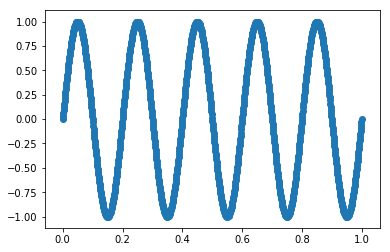

In [42]:
plt.scatter(data,label)

In [43]:
data = data.reshape((len(data),1))
label = label.reshape((len(label),1))

In [44]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.4, random_state=42)

In [45]:
v, data_frame = LpMinimizeRegression(x_train,y_train)

time: 3.7291767597198486
Status: Optimal


In [46]:
data_frame

t         v             p             e
0    0.000000  0.000000  6.051666e-03  6.051666e-03
1    0.000000  0.000000  6.671556e-05  6.671556e-05
2    0.000000  0.000000 -6.337782e-06  6.337782e-06
3    0.000000  0.000000 -5.717156e-05  5.717156e-05
4    0.000000  0.000000  8.773009e-06  8.773009e-06
5    0.000000  0.000000 -7.794724e-05  7.794724e-05
6    0.000000  0.000000  2.712730e-03  2.712730e-03
7    0.000000  0.000000 -1.148017e-05  1.148017e-05
8    0.000000  0.000000  1.378595e-02  1.378595e-02
9    0.000000  0.000000 -4.158116e-05  4.158116e-05
10   0.000000  0.000000 -8.866445e-05  8.866445e-05
11   0.000000  0.000000  4.811311e-03  4.811311e-03
12   0.000000  0.000000 -3.836133e-04  3.836133e-04
13   0.000000  0.000000 -2.002785e-04  2.002785e-04
14   0.000000  0.000000  5.837227e-04  5.837227e-04
15   0.000000  0.000000 -1.161320e-04  1.161320e-04
16   0.000000  0.000000  0.000000e+00  0.000000e+00
17   0.000000  0.000000  5.981805e-04  5.981805e-04
18   0.000000  0.000000 -9.236248e-05  9.236248e-05
19   0.763746  0.694315 -7.542884e-05  7.542884e-05
20   0.000000  0.000000 -1.547784e-02  1.547784e-02
21   0.000000  0.000000 -8.942874e-05  8.942874e-05
22   0.000000  0.000000  1.260682e-04  1.260682e-04
23   0.000000  0.000000  2.228178e-05  2.228178e-05
24   0.000000  0.000000 -7.191722e-05  7.191722e-05
25   0.000000  0.000000 -5.572792e-07  5.572792e-07
26   0.000000  0.000000 -8.828815e-03  8.828815e-03
27   0.000000  0.000000  2.898877e-03  2.898877e-03
28   0.000000  0.000000 -5.425970e-06  5.425970e-06
29   0.000000  0.000000 -1.066407e-04  1.066407e-04
..        ...       ...           ...           ...
571  0.000000  0.000000 -5.212907e-04  5.212907e-04
572  0.000000  0.000000 -1.027264e-06  1.027264e-06
573  0.000000  0.000000  1.555040e-04  1.555040e-04
574  0.000000  0.000000  8.939704e-06  8.939704e-06
575  0.000000  0.000000  9.177465e-05  9.177465e-05
576  0.000000  0.000000 -8.974865e-06  8.974865e-06
577  0.000000  0.000000 -2.293432e-04  2.293432e-04
578  0.000000  0.000000  1.212046e-04  1.212046e-04
579  0.000000  0.000000  2.554617e-05  2.554617e-05
580  0.000000  0.000000  2.409217e-03  2.409217e-03
581  0.000000  0.000000  2.944122e-05  2.944122e-05
582  0.000000  0.000000 -1.023334e-03  1.023334e-03
583  0.000000  0.000000 -5.270124e-03  5.270124e-03
584  0.000000  0.000000 -3.337640e-06  3.337640e-06
585  0.000000  0.000000 -8.588066e-03  8.588066e-03
586  0.000000  0.000000 -8.196028e-06  8.196028e-06
587  0.000000  0.000000 -2.677780e-06  2.677780e-06
588  0.000000  0.000000  5.078105e-04  5.078105e-04
589  0.000000  0.000000  5.878000e-05  5.878000e-05
590  0.000000  0.000000  1.580534e-03  1.580534e-03
591  0.000000  0.000000  4.996367e-06  4.996367e-06
592  0.000000  0.000000 -7.159877e-03  7.159877e-03
593  0.000000  0.000000 -1.103181e-04  1.103181e-04
594  0.000000  0.000000 -5.303009e-03  5.303009e-03
595  0.000000  0.000000 -2.643571e-03  2.643571e-03
596  0.000000  0.000000 -1.349016e-04  1.349016e-04
597  0.000000  0.000000 -1.022118e-03  1.022118e-03
598  0.000000  0.000000 -7.803171e-05  7.803171e-05
599  0.000000  0.000000 -4.145752e-03  4.145752e-03
600  0.000000 -0.003693  0.000000e+00  0.000000e+00

[601 rows x 4 columns]

### number of V = 0

In [47]:
len(v)- np.count_nonzero(v)

578

### Total number of V

In [48]:
len(v)

601

### accuracy on train data

In [49]:
r = calculateMAE(x_train,y_train,x_train,v)

MSE 0.0002675716013068517
avg output 0.010800808463999046


Text(0.5, 1.0, 'train data')

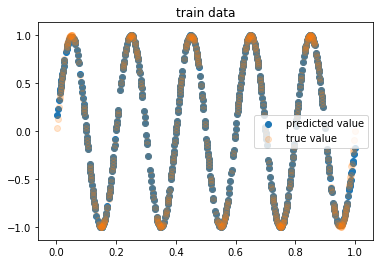

In [50]:
plt.scatter(x_train,r,label = 'predicted value')
plt.scatter(x_train,y_train,alpha = 0.2,label = 'true value')
plt.legend()
plt.title('train data')

### accuracy on test data

In [51]:
r = calculateMAE(x_test,y_test,x_train,v)

MSE 0.0005407950572377386
avg output -0.016201212695983687


Text(0.5, 1.0, 'test data')

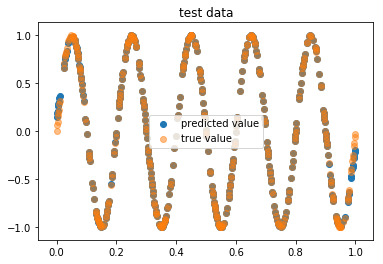

In [52]:
plt.scatter(x_test,r,label = 'predicted value')
plt.scatter(x_test,y_test,alpha = 0.5,label = 'true value')
plt.legend()
plt.title('test data')

## Other Dataset

In [8]:
gamma = 200
landa = 1
error_weight = 1

In [9]:
import pandas as pd

In [10]:
data = pd.read_excel('regdata2000.xlsx')

In [11]:
data = data.get_values()

In [12]:
x_train = data[:,:-1]
x_train/=np.max(x_train,axis=0)

In [13]:
y_train  = data[:,-1:]

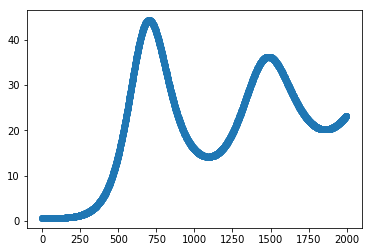

In [18]:
plt.scatter(np.arange(len(y_train)),y_train)

In [33]:
v,data_frame = LpMinimizeRegression(x_train,y_train)

0
25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475
500
525
550
575
600
625
650
675
700
725
750
775
800
825
850
875
900
925
950
975
1000
1025
1050
1075
1100
1125
1150
1175
1200
1225
1250
1275
1300
1325
1350
1375
1400
1425
1450
1475
1500
1525
1550
1575
1600
1625
1650
1675
1700
1725
1750
1775
1800
1825
1850
1875
1900
1925
1950
1975
begin solve
time: 72.32323098182678
Status: Optimal


In [22]:
data_frame

t          v         p         e
0     19.147604 -19.147604 -1.114485  1.114485
1      0.000000   0.000000 -1.044974  1.044974
2      0.000000   0.000000 -0.977767  0.977767
3      0.000000   0.000000 -0.912840  0.912840
4      0.000000   0.000000 -0.850165  0.850165
5      0.000000   0.000000 -0.789716  0.789716
6      0.000000   0.000000 -0.731463  0.731463
7      0.000000   0.000000 -0.675378  0.675378
8      0.000000   0.000000 -0.621431  0.621431
9      0.000000   0.000000 -0.569592  0.569592
10     0.000000   0.000000 -0.519830  0.519830
11     0.000000   0.000000 -0.472114  0.472114
12     0.000000   0.000000 -0.426411  0.426411
13     0.000000   0.000000 -0.382689  0.382689
14     0.000000   0.000000 -0.340915  0.340915
15     0.000000   0.000000 -0.301056  0.301056
16     0.000000   0.000000 -0.263076  0.263076
17     0.000000   0.000000 -0.226941  0.226941
18     0.000000   0.000000 -0.192616  0.192616
19     0.000000   0.000000 -0.160066  0.160066
20     0.000000   0.000000 -0.129255  0.129255
21     0.000000   0.000000 -0.100147  0.100147
22     0.000000   0.000000 -0.072704  0.072704
23     0.000000   0.000000 -0.046891  0.046891
24     0.000000   0.000000 -0.022668  0.022668
25     0.000000   0.000000  0.000000  0.000000
26     0.000000   0.000000  0.021152  0.021152
27     0.000000   0.000000  0.040827  0.040827
28     0.000000   0.000000  0.059062  0.059062
29     0.000000   0.000000  0.075896  0.075896
...         ...        ...       ...       ...
1970   0.000000   0.000000 -0.006889  0.006889
1971   0.000000   0.000000 -0.007877  0.007877
1972   0.000000   0.000000 -0.008807  0.008807
1973   0.000000   0.000000 -0.009655  0.009655
1974   0.000000   0.000000 -0.010395  0.010395
1975   0.000000   0.000000 -0.011000  0.011000
1976   0.000000   0.000000 -0.011443  0.011443
1977   0.000000   0.000000 -0.011693  0.011693
1978   0.000000   0.000000 -0.011720  0.011720
1979   0.000000   0.000000 -0.011493  0.011493
1980   0.000000   0.000000 -0.010978  0.010978
1981   0.000000   0.000000 -0.010144  0.010144
1982   0.000000   0.000000 -0.008956  0.008956
1983   0.000000   0.000000 -0.007382  0.007382
1984   0.000000   0.000000 -0.005386  0.005386
1985   0.000000   0.000000 -0.002937  0.002937
1986   0.000000   0.000000  0.000000  0.000000
1987   0.000000   0.000000  0.003458  0.003458
1988   0.000000   0.000000  0.007469  0.007469
1989   0.000000   0.000000  0.012065  0.012065
1990   0.000000   0.000000  0.017276  0.017276
1991   0.000000   0.000000  0.023134  0.023134
1992   0.000000   0.000000  0.029666  0.029666
1993   0.000000   0.000000  0.036900  0.036900
1994   0.000000   0.000000  0.044863  0.044863
1995   0.000000   0.000000  0.053578  0.053578
1996   0.000000   0.000000  0.063069  0.063069
1997   0.000000   0.000000  0.073359  0.073359
1998   0.000000   0.000000  0.084465  0.084465
1999   0.000000  23.934891  0.000000  0.000000

[2000 rows x 4 columns]

### number of V = 0

In [25]:
len(v)- np.count_nonzero(v)

1813

### Total number of V

In [23]:
len(v)

2000

In [24]:
r = calculateMAE(x_train,y_train,x_train,v)

MAE 0.011655301558417522
avg output 20.19477993622235


Text(0.5, 1.0, 'train data')

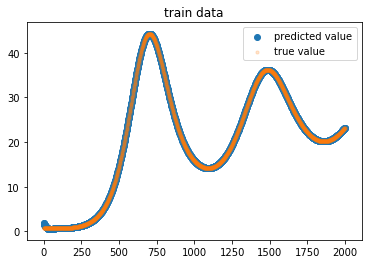

In [32]:
plt.scatter(np.arange(len(r)),r,label = 'predicted value')
plt.scatter(np.arange(len(y_train)),y_train,alpha = 0.2,label = 'true value',s=10)
plt.legend()
plt.title('train data')